### References:
- 

### Skeleton Format:

```python
class class_name:

    def __init__(self, _, _, _):
    
    def func_1():
    
    |
    |
    |
    V

    def func_n():
    
    
class_object = class_name(_, _, _)
class_object.fit(data)
```

## 2. Section B (Scratch Implementation)
- Implementing Logistic Regression from scratch and using Gradient Descent methods to arrive at an optima. Only numpy.
- Splitting in ratio of 70:15:15.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
filepath = "/Users/U/Desktop/CSE343 Machine Learning/Assignments/2022097_HW1/data/Heart Disease.csv"
df = pd.read_csv(filepath)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.isnull().sum()
df_cleaned = df.dropna()
df_cleaned.isnull().sum()
print(df_cleaned.shape)

(3656, 16)


In [4]:
y = df_cleaned['HeartDisease']
X = df_cleaned.drop(columns=['HeartDisease'])
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
376,0,45,2.0,1,20.0,0.0,0,0,0,285.0,116.0,87.0,23.85,65.0,55.0
2147,0,59,3.0,0,0.0,0.0,0,0,0,293.0,124.0,74.0,25.56,72.0,77.0
2407,0,49,1.0,1,20.0,0.0,0,0,0,323.0,123.5,78.0,22.86,92.0,63.0
423,0,58,3.0,0,0.0,0.0,0,1,0,188.0,160.0,120.0,35.58,88.0,85.0
3671,1,56,1.0,0,0.0,1.0,1,1,0,208.0,167.0,92.0,24.66,60.0,75.0


In [6]:
epsilon = 1e-9 # avoid dividing by zero

In [7]:
class LogisticRegression:

    def __init__(self, learning_rate = 0.01, epochs = 1000, threshold = 0.5):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.clip(z, -10, 10) # stopping e^z going too high 
        return 1 / (1 + (np.exp(-z)))
    
    def loss(self, y_label, y_cap):
        # return - np.dot(y_label, np.log(y_cap + epsilon)) - np.dot(1 - y_label, np.log(1 - y_cap + epsilon))
        # this is wrong because need to take mean

        return - np.mean(y_label * np.log(y_cap + epsilon) + (1 - y_label) * np.log(1 - y_cap + epsilon))
        
    
    def predict(self, y_cap): 
        y_pred = []
        for i in range(len(y_cap)):
            if y_cap[i] >= self.threshold: y_pred.append(1)
            else: y_pred.append(0)
        return y_pred
    
    def accuracy(self, y_label, y_pred):
        #  count = 0
        #  for i in range(len(y_label)):
        #      if (y_label[i] == y_cap[i]):
        #          count += 1 
        # return count
        # cool!
        return np.mean(y_label == y_pred)
        

    def fit(self, X_train, y_train, X_val, y_val):
        # vector of 0s of length = number of dimensions
        self.weights = np.zeros(X_train.shape[1])
        # same for all, hence all start = 0
        self.bias = 0

        # for the purpose of visualization
        training_loss_vector = []
        validation_loss_vector = []
        training_acc_vector = []
        validation_acc_vector = []

        for _ in range(self.epochs):

            z = np.dot(X_train, self.weights) + self.bias
            y_cap = self.sigmoid(z)

            cur_training_loss = self.loss(y_train, y_cap)
            training_loss_vector.append(cur_training_loss)
            cur_training_pred = self.predict(y_cap)
            cur_training_acc = self.accuracy(y_train, cur_training_pred)
            training_acc_vector.append(cur_training_acc)
            
            z_val = np.dot(X_val, self.weights) + self.bias
            y_cap_val = self.sigmoid(z_val)

            cur_validation_loss = self.loss(y_val, y_cap_val)
            validation_loss_vector.append(cur_validation_loss)
            cur_validation_pred = self.predict(y_cap_val)
            cur_validation_acc = self.accuracy(y_val, cur_validation_pred)
            validation_acc_vector.append(cur_validation_acc)

            cur_pred = self.predict(y_cap)

            dif_weights = (1 / X_train.shape[0]) * np.dot(X_train.T, (y_cap - y_train))
            dif_bias = (1 / X_train.shape[0]) * np.sum(y_cap - y_train)
            self.weights -= self.learning_rate * dif_weights
            self.bias -= self.learning_rate * dif_bias
            
            # print("Loss = ", cur_loss)
            # print("Weights = ", self.weights)
            # print("Bias = ", self.bias)

        return training_loss_vector, validation_loss_vector, training_acc_vector, validation_acc_vector, cur_validation_pred, y_cap_val
    
    # def test(self, X_test, y_test):

    #     loss_vector = []

    #     z = np.dot(X, self.weights) + self.bias
    #     y_cap = self.sigmoid(z)

    #     for i in range()



In [8]:
learning_rate = 0.00001
epochs = 200
threshold = 0.15

model1 = LogisticRegression(learning_rate=learning_rate, epochs=epochs, threshold=threshold)
training_loss_vector, validation_loss_vector, training_acc_vector, validation_acc_vector, y_val_pred, y_val_prob = model1.fit(X_train, y_train, X_val, y_val)


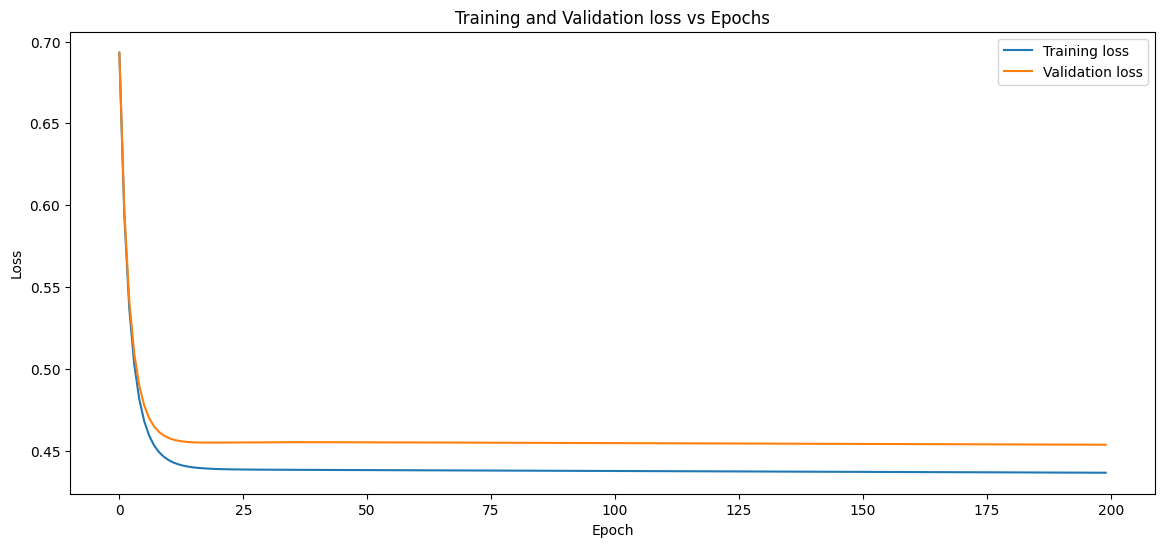

Training loss =  0.43657077900920965
Validation loss =  0.4536702584975242


In [9]:
plt.figure(figsize=(14, 6))
plt.plot(training_loss_vector, label='Training loss')
plt.plot(validation_loss_vector, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training and Validation loss vs Epochs")
# plt.text(epochs/3, 0.65, f"Learning rate = {learning_rate}\nEpochs = {epochs}")
plt.legend()
plt.show()

print("Training loss = ", training_loss_vector[-1])
print("Validation loss = ", validation_loss_vector[-1])

Training loss is *slightly* lower than Validation loss, as expected. They converge to ~global minima. quite early, showing that such high number of epochs is probably unnecessary. Overfitting is likely.

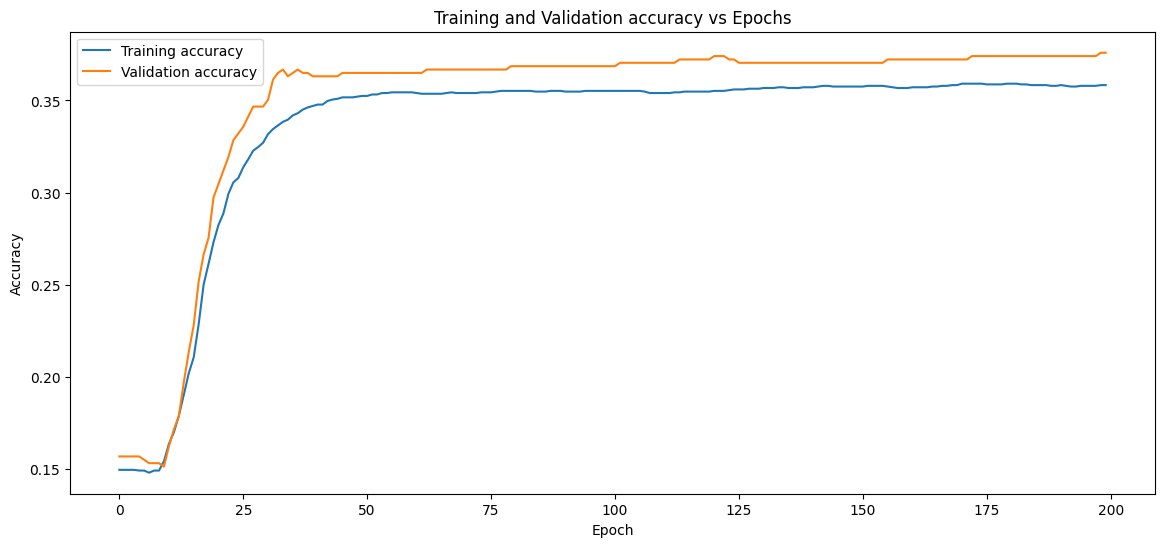

Training accuracy =  0.3583431027745213
Validation accuracy =  0.3759124087591241


In [10]:
plt.figure(figsize=(14, 6))
plt.plot(training_acc_vector, label='Training accuracy')
plt.plot(validation_acc_vector, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation accuracy vs Epochs")
plt.legend()
plt.show()

print("Training accuracy = ", training_acc_vector[-1])
print("Validation accuracy = ", validation_acc_vector[-1])

Training accuracy is *slightly* higher than validation accuracy, as expected. Both plateau at about 90%. Again, they converge to this max. even earlier, showing that such high number of epochs is probably unnecessary. Again, overfitting?

Part (b)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
X_min = np.min(X, axis=0)  # min in columns
X_max = np.max(X, axis=0)  # max in column
X_scaled = (X - X_min) / (X_max - X_min + epsilon)  
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [12]:
X_scaled.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119


In [13]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, train_size=0.7, random_state=42)
X_val_scaled, X_test_scaled, y_val_scaled, y_test_scaled = train_test_split(X_test_scaled, y_test_scaled, train_size=0.5, random_state=42)

learning_rate = 0.01
epochs = 5000
threshold = 0.15

model2 = LogisticRegression(learning_rate=learning_rate, epochs=epochs, threshold=threshold)
training_loss_vector_scaled, validation_loss_vector_scaled, training_acc_vector_scaled, validation_acc_vector_scaled, y_val_pred_scaled, y_val_prob_scaled = model2.fit(X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled)


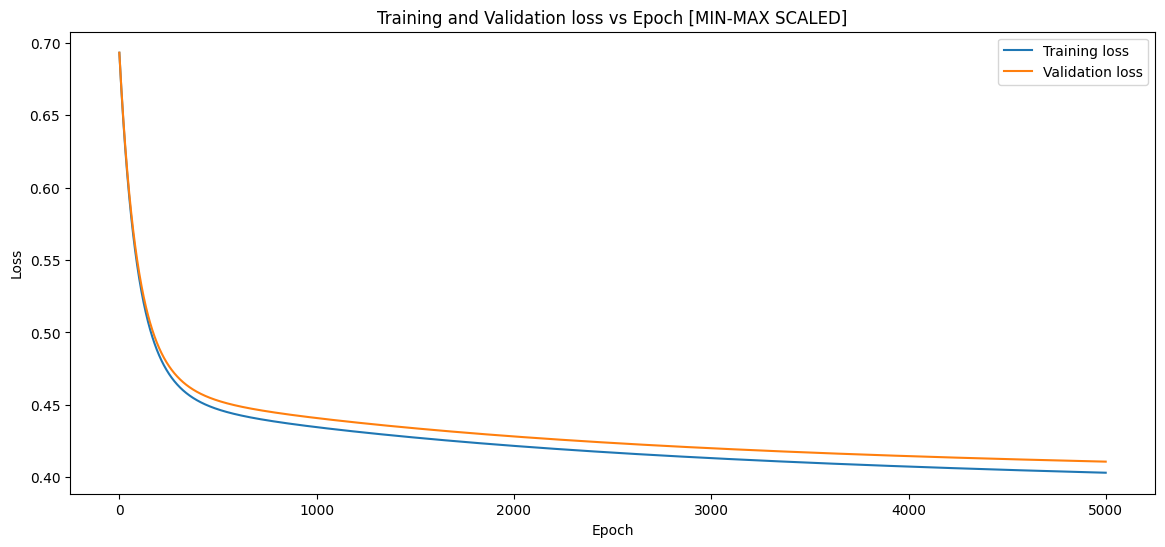

Training loss =  0.40312717280702276
Validation loss =  0.4107831187410535


In [14]:
plt.figure(figsize=(14, 6))
plt.plot(training_loss_vector_scaled, label='Training loss')
plt.plot(validation_loss_vector_scaled, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training and Validation loss vs Epoch [MIN-MAX SCALED]")
# plt.text(epochs/3, 0.65, f"Learning rate = {learning_rate}\nEpochs = {epochs}")
plt.legend()
plt.show()

print("Training loss = ", training_loss_vector_scaled[-1])
print("Validation loss = ", validation_loss_vector_scaled[-1])

The model converges much later than in the No-Scaling case. I've had to run it with higher epochs to show the curve, else running it at `epoch=200` was causing it to be just a sloping line.

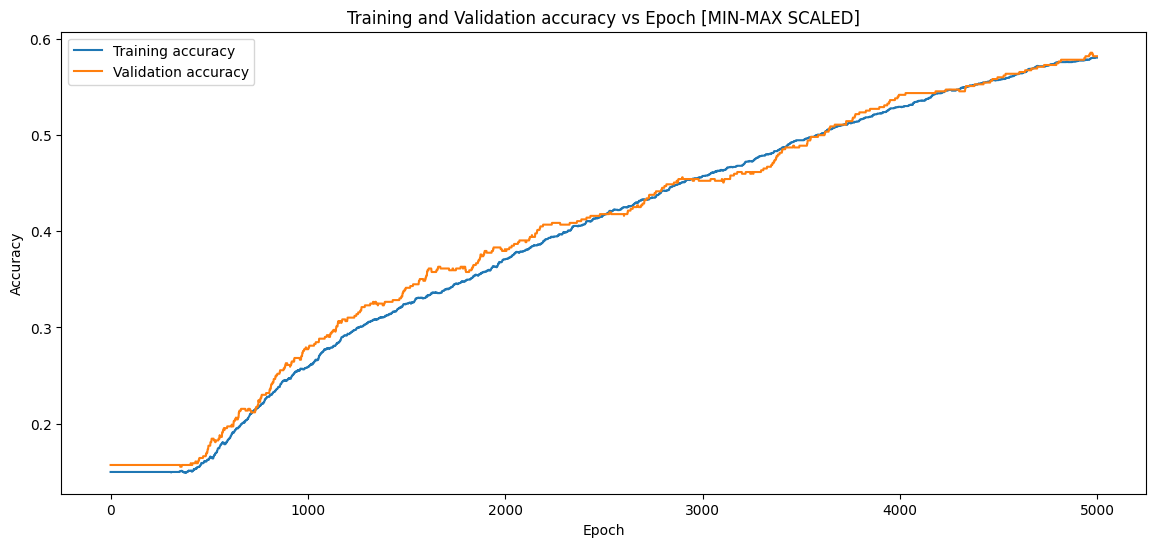

Training accuracy =  0.580695584212583
Validation accuracy =  0.5821167883211679


In [15]:
plt.figure(figsize=(14, 6))
plt.plot(training_acc_vector_scaled, label='Training accuracy')
plt.plot(validation_acc_vector_scaled, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation accuracy vs Epoch [MIN-MAX SCALED]")
plt.legend()
plt.show()

print("Training accuracy = ", training_acc_vector_scaled[-1])
print("Validation accuracy = ", validation_acc_vector_scaled[-1])

The model with no scaling i.e. `model1` is doing better. I've used the same gradient = 0.15 for both.

Confusion Matrix:
 [[163 299]
 [ 43  43]]
Precision: 0.13
Recall: 0.50
F1 Score: 0.20
ROC-AUC Score: 0.37


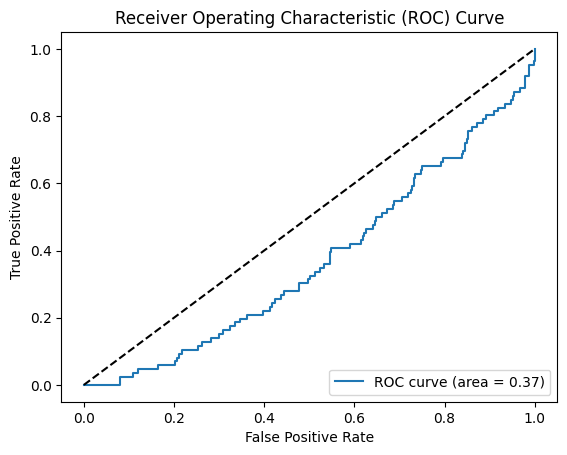

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1 Score
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_val, y_val_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Very poor precision, recall, F1 score and area of ROC curve. The curve is on the wrong side of the y=x line. This is all because of a bad setting of threshold value. 

In [58]:
class LogisticRegression_Enhanced:

    def __init__(self, learning_rate=0.001, epochs=1000, threshold=0.5, val_testing=0, regularization=None, regularization_coeff=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.threshold = threshold
        self.weights = None
        self.bias = None
        self.val_testing = val_testing
        self.regularization = regularization
        self.regularization_coeff = regularization_coeff

    def sigmoid(self, z):
        z = np.clip(z, -10, 10) 
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_label, y_cap): 
        ret = -np.mean(y_label * np.log(y_cap + epsilon) + (1 - y_label) * np.log(1 - y_cap + epsilon))
        if self.regularization == 'l1':
            ret += self.regularization_coeff * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            ret += self.regularization_coeff * np.sum(self.weights ** 2)
        return ret
        
    def predict(self, y_cap): 
        return [1 if prob >= self.threshold else 0 for prob in y_cap]
    
    def accuracy(self, y_label, y_pred):
        return np.mean(y_label == y_pred)
    
    # [Reference: https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/]
    
    def fit(self, X_train, y_train, X_val=None, y_val=None, batch_size=1, early_stopping=False, wait=1):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0

        training_loss_vector = []
        validation_loss_vector = []
        training_acc_vector = []
        validation_acc_vector = []

        best_val_loss = float('inf')
        wait_counter = 0

        for epoch in range(self.epochs):
            # Mixing the dataset up a bit. Enforcing randomness to avoid any massive bad-luck type scenarios.
            indices = np.random.permutation(X_train.shape[0])
            X_shuffled = X_train.iloc[indices]
            y_shuffled = y_train.iloc[indices]

            # Descending in batches
            for start in range(0, X_train.shape[0], batch_size):
                end = start + batch_size
                X_batch = X_shuffled.iloc[start:end]
                y_batch = y_shuffled.iloc[start:end]

                z = np.dot(X_batch, self.weights) + self.bias
                y_cap = self.sigmoid(z)

                dif_weights = (1 / X_batch.shape[0]) * np.dot(X_batch.T, (y_cap - y_batch))
                dif_bias = (1 / X_batch.shape[0]) * np.sum(y_cap - y_batch)

                if self.regularization == 'l1':
                    dif_weights += self.regularization_coeff * np.sign(self.weights) / X_batch.shape[0]
                elif self.regularization == 'l2':
                    dif_weights += self.regularization_coeff * 2 * self.weights / X_batch.shape[0]
                self.weights -= self.learning_rate * dif_weights
                self.bias -= self.learning_rate * dif_bias

            z_train = np.dot(X_train, self.weights) + self.bias
            y_cap_train = self.sigmoid(z_train)
            training_loss_vector.append(self.loss(y_train, y_cap_train))
            training_acc_vector.append(self.accuracy(y_train, self.predict(y_cap_train)))
            y_cap_val = np.array([])

            if self.val_testing and X_val is not None and y_val is not None:
                z_val = np.dot(X_val, self.weights) + self.bias
                y_cap_val = self.sigmoid(z_val)
                val_loss = self.loss(y_val, y_cap_val)
                validation_loss_vector.append(val_loss)
                validation_acc_vector.append(self.accuracy(y_val, self.predict(y_cap_val)))

                if early_stopping:
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        wait_counter = 0
                    else:
                        wait_counter += 1
                    if wait_counter >= wait:
                        print(f"Stopped early due to increase in loss at epoch = {epoch}")
                        break
        return training_loss_vector, validation_loss_vector, training_acc_vector, validation_acc_vector, self.predict(y_cap_val) if len(y_cap_val) > 0 else self.predict(y_cap_train), y_cap_val if len(y_cap_val) > 0 else y_cap_train
    
    # [Reference: https://medium.com/@avijit.bhattacharjee1996/implementing-k-fold-cross-validation-from-scratch-in-python-ae413b41c80d]

    def safe_divide(self, numerator, denominator):
        epsilon = 1e-10  # Small value to avoid division by zero
        return numerator / (denominator + epsilon)


    def k_fold_cross_validation(self, X, y, k=5, batch_size=1, early_stopping=False, wait=1):
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        fold_size = len(y) // k
        accuracies, precisions, recalls, f1s = [], [], [], []

        for i in range(k):
            start, end = i * fold_size, (i + 1) * fold_size
            val_indices = indices[start:end]
            train_indices = np.concatenate((indices[:start], indices[end:]))
            X_train, X_val = X.iloc[train_indices], X.iloc[val_indices]
            y_train, y_val = y.iloc[train_indices], y.iloc[val_indices]

            self.fit(X_train, y_train, X_val, y_val, batch_size=batch_size, early_stopping=early_stopping, wait=wait)
            y_pred = self.predict(self.sigmoid(np.dot(X_val, self.weights) + self.bias))

            # Use safe division to avoid division by zero
            precision = self.safe_divide(np.sum((np.array(y_pred) == 1) & (y_val == 1)), np.sum(np.array(y_pred) == 1))
            recall = self.safe_divide(np.sum((np.array(y_pred) == 1) & (y_val == 1)), np.sum(y_val == 1))
            f1 = 2 * self.safe_divide(precision * recall, precision + recall)
            accuracy = np.mean(y_val == y_pred)

            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)

        return accuracies, precisions, recalls, f1s



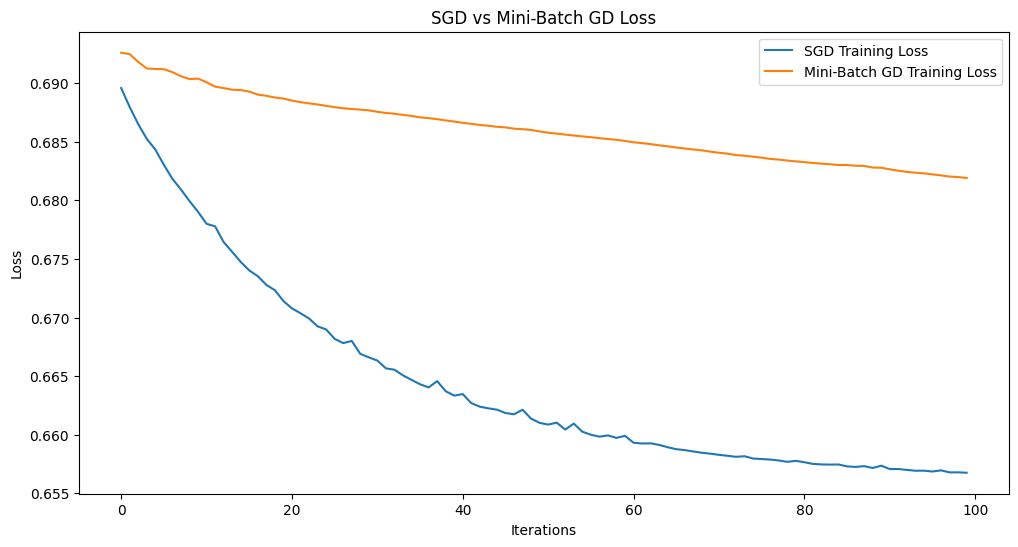

In [60]:
model_sgd = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100)
training_loss_sgd, _, training_acc_sgd, _, _, _ = model_sgd.fit(
    X_train, y_train, X_val, y_val, batch_size=1)

model_mbgd = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100)
training_loss_mbgd, _, training_acc_mbgd, _, _, _ = model_mbgd.fit(
    X_train, y_train, X_val, y_val, batch_size=16)

plt.figure(figsize=(12, 6))
plt.plot(training_loss_sgd, label='SGD Training Loss')
plt.plot(training_loss_mbgd, label='Mini-Batch GD Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('SGD vs Mini-Batch GD Loss')
plt.legend()
plt.show()

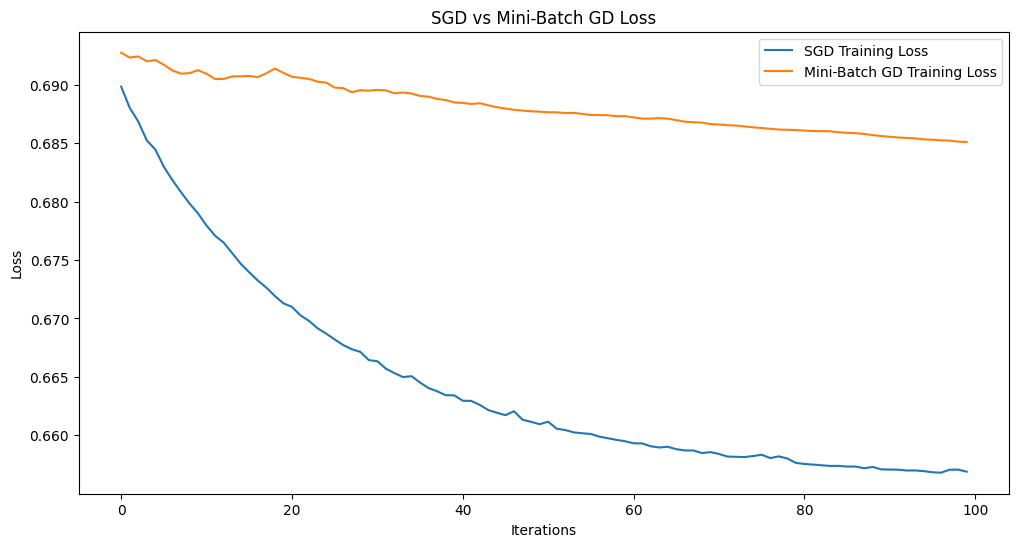

In [62]:
model_sgd = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100)
training_loss_sgd, _, training_acc_sgd, _, _, _ = model_sgd.fit(
    X_train, y_train, X_val, y_val, batch_size=1)

model_mbgd = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100)
training_loss_mbgd, _, training_acc_mbgd, _, _, _ = model_mbgd.fit(
    X_train, y_train, X_val, y_val, batch_size=32)

plt.figure(figsize=(12, 6))
plt.plot(training_loss_sgd, label='SGD Training Loss')
plt.plot(training_loss_mbgd, label='Mini-Batch GD Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('SGD vs Mini-Batch GD Loss')
plt.legend()
plt.show()

In [61]:
# [Reference: Neatness using GPT4o]

model_kfold = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100, regularization=None)
accuracy_list, precision_list, recall_list, f1_list = model_kfold.k_fold_cross_validation(
    X_train, y_train, k=5, batch_size=16, early_stopping=False, wait=5)

results = {
    'accuracy': (np.mean(accuracy_list), np.std(accuracy_list)),
    'precision': (np.mean(precision_list), np.std(precision_list)),
    'recall': (np.mean(recall_list), np.std(recall_list)),
    'f1': (np.mean(f1_list), np.std(f1_list))
}

print("K-Fold Cross-Validation Results:")
for metric, (mean, std) in results.items():
    print(f"{metric.capitalize()}: Mean = {mean:.4f}, Std Dev = {std:.4f}")

K-Fold Cross-Validation Results:
Accuracy: Mean = 0.4500, Std Dev = 0.0548
Precision: Mean = 0.0400, Std Dev = 0.0800
Recall: Mean = 0.0667, Std Dev = 0.1333
F1: Mean = 0.0500, Std Dev = 0.1000


Stopped early due to increase in loss at epoch = 10
Stopped early due to increase in loss at epoch = 30


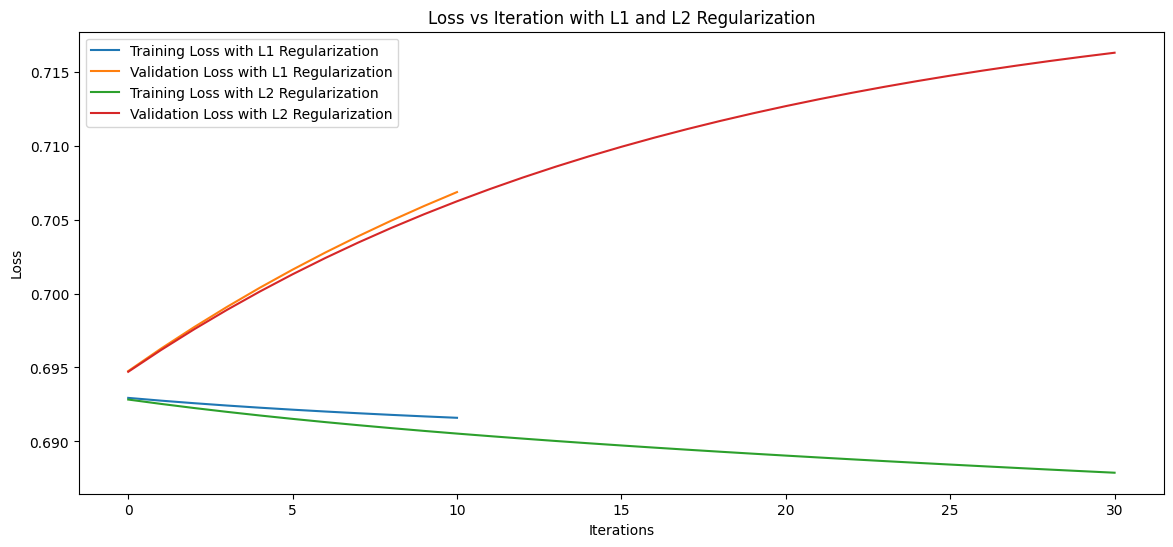

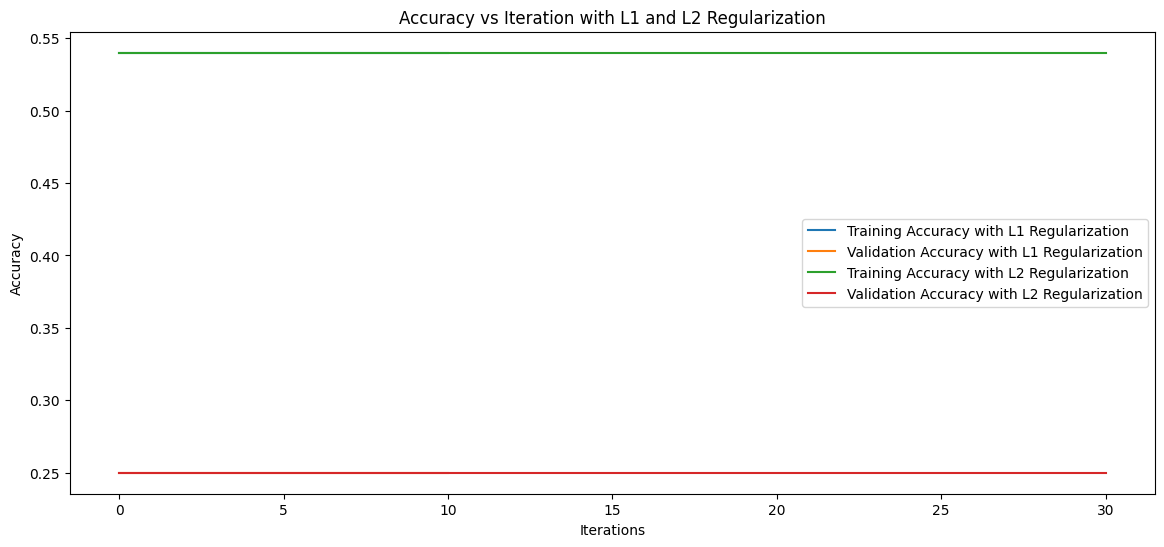

In [39]:
# [Reference: Neatness using GPT4o]

model_l1 = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100, val_testing=1, regularization='l1', regularization_coeff=0.01)
training_loss_l1, validation_loss_l1, training_acc_l1, validation_acc_l1, _, _ = model_l1.fit(
    X_train, y_train, X_val, y_val, batch_size=16, early_stopping=True, wait=10)

model_l2 = LogisticRegression_Enhanced(learning_rate=0.01, epochs=100, val_testing=1, regularization='l2', regularization_coeff=0.01)
training_loss_l2, validation_loss_l2, training_acc_l2, validation_acc_l2, _, _ = model_l2.fit(
    X_train, y_train, X_val, y_val, batch_size=16, early_stopping=True, wait=30)

plt.figure(figsize=(14, 6))
plt.plot(training_loss_l1, label='Training Loss with L1 Regularization')
plt.plot(validation_loss_l1, label='Validation Loss with L1 Regularization')
plt.plot(training_loss_l2, label='Training Loss with L2 Regularization')
plt.plot(validation_loss_l2, label='Validation Loss with L2 Regularization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iteration with L1 and L2 Regularization')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(training_acc_l1, label='Training Accuracy with L1 Regularization')
plt.plot(validation_acc_l1, label='Validation Accuracy with L1 Regularization')
plt.plot(training_acc_l2, label='Training Accuracy with L2 Regularization')
plt.plot(validation_acc_l2, label='Validation Accuracy with L2 Regularization')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration with L1 and L2 Regularization')
plt.legend()
plt.show()
